In [2]:
#6/6/24 Attempt at creating an Autoencoder specifically for classification with fingerprinting data
#Suppress unneeded low level warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import pandas as pd
import numpy as np
#Data import
targetdata = pd.read_csv('/Users/james/Documents/Honours/Data/Targetdata/DrugTargets.csv')

#Creating test/train splits
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(targetdata, test_size=0.2, random_state=82)
#Converts Toxicity Values to a list
temp = trainset['Toxicity_Value']
ytrain = []
for items in temp:
    ytrain.append(items)
ytest = testset['Toxicity_Value'].values
#Converts encoded drug target values to an array
xtrain = trainset.iloc[:, 2:].values
xtest = testset.iloc[:, 2:].values

In [3]:
targetdata

,SMILES,Toxicity_Value,"('CHEMBL4768',)","('CHEMBL226',)","('CHEMBL3571',)","('CHEMBL3706',)","('CHEMBL5979',)","('CHEMBL2035',)","('CHEMBL2652',)","('CHEMBL3714079',)",...,"('CHEMBL252',)","('CHEMBL1628481',)","('CHEMBL1792',)","('CHEMBL208',)","('CHEMBL2888',)","('CHEMBL3991',)","('CHEMBL228',)","('CHEMBL3776',)","('CHEMBL3108639',)","('CHEMBL325',)"
0,Clc1ccc(Cn2c(CN3CCCC3)nc3ccccc32)cc1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,COc1ccccc1N1CCN(CCCC(=O)c2ccc(F)cc2)CC1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CNC(=O)Oc1cccc2c1OC(C)(C)C2,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Cc1cc(Cl)ccc1O,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CCCN(CCC)c1c([N+](=O)[O-])cc(C(F)(F)F)cc1[N+](...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13239,C#CCC(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)N[C@@H]...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13240,CN(C)CC/C=C1/c2ccccc2CSc2ccccc21,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13241,CC1=C[C@H](O)CC(C)(C)[C@H]1/C=C/C(C)=C/C=C/C(C...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13242,CCC1OC(=O)C[C@@H](O)[C@H](C)[C@@H](O[C@@H]2O[C...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import BatchNormalization

# Determines layer size and input/output
# Here it turns the 334 one hot encoded features to 42
keras.utils.set_random_seed(81)
tf.config.experimental.enable_op_determinism()
length = len(xtrain[0])
temp = length
# Encoder Creation
enc_in = keras.Input(shape=(length, 1))
x = keras.layers.Flatten()(enc_in)

# Additional encoder layers
x = keras.layers.Dense(160, activation="relu")(x)
x = keras.layers.Dense(81, activation="relu")(x)
x = keras.layers.Dense(42, activation="relu")(x)

enc_out = keras.layers.Dense(1, activation="sigmoid")(x)
autoencoder = keras.Model(enc_in, enc_out, name='autoencoder')

# Optimiser
optimise = tf.keras.optimizers.Adam(learning_rate=0.00001)

autoencoder.compile(optimise, loss='binary_crossentropy')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 334, 1)]          0         
                                                                 
 flatten (Flatten)           (None, 334)               0         
                                                                 
 dense (Dense)               (None, 160)               53600     
                                                                 
 dense_1 (Dense)             (None, 81)                13041     
                                                                 
 dense_2 (Dense)             (None, 42)                3444      
                                                                 
 dense_3 (Dense)             (None, 1)                 43        
                                                                 
Total params: 70,128
Trainable params: 70,128
Non-train

In [15]:
#Runs and creates the autoencoder and outputs parameters to a specs file
ytrain = np.array(ytrain)
epochs = 3000
batchsize = 16
losshistory = []

minloss = 1
bestepoch = 0
for epoch in range(epochs):
    logs = autoencoder.fit(
    xtrain,
    ytrain,
    epochs=1,
    batch_size=batchsize),
    validation_split=0.2,
    
    #autoencoder.save(str(f"models/AE-{epoch+1}.keras"))
    loss = logs[0].history['loss'][0]
    losshistory.append(loss)
    if loss < minloss:
        minloss = loss
        bestepoch = epoch
        
#autoencoder.save(str(f"test/AE-{epoch+1}.keras"))
    

663/663 [==============================] - 0s 557us/step - loss: 0.3220


663/663 [==============================] - 0s 514us/step - loss: 0.3186


663/663 [==============================] - 0s 500us/step - loss: 0.3159


663/663 [==============================] - 0s 509us/step - loss: 0.3137


663/663 [==============================] - 0s 527us/step - loss: 0.3119


663/663 [==============================] - 0s 503us/step - loss: 0.3105


663/663 [==============================] - 0s 487us/step - loss: 0.3093


663/663 [==============================] - 0s 489us/step - loss: 0.3082


663/663 [==============================] - 0s 493us/step - loss: 0.3074


663/663 [==============================] - 0s 510us/step - loss: 0.3066


663/663 [==============================] - 0s 498us/step - loss: 0.3059


663/663 [==============================] - 1s 774us/step - loss: 0.3053


663/663 [==============================] - 0s 550us/step - loss: 0.3049


663/663 [==============================] - 0s 545us/step - loss: 0.3044


663/663 [==============================] - 0s 553us/step - loss: 0.3040


663/663 [==============================] - 0s 558us/step - loss: 0.3036


663/663 [==============================] - 0s 560us/step - loss: 0.3033


663/663 [==============================] - 0s 567us/step - loss: 0.3029


663/663 [==============================] - 0s 586us/step - loss: 0.3026


663/663 [==============================] - 0s 634us/step - loss: 0.3023


663/663 [==============================] - 0s 570us/step - loss: 0.3021


663/663 [==============================] - 0s 566us/step - loss: 0.3018


663/663 [==============================] - 0s 577us/step - loss: 0.3016


663/663 [==============================] - 0s 555us/step - loss: 0.3013


663/663 [==============================] - 0s 557us/step - loss: 0.3011


663/663 [==============================] - 0s 567us/step - loss: 0.3009


663/663 [==============================] - 0s 556us/step - loss: 0.3008


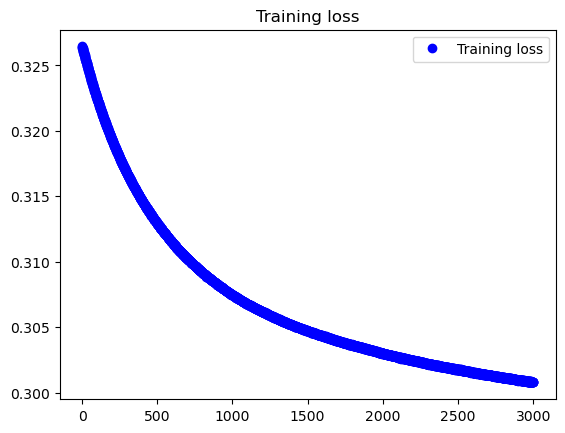

In [16]:
import matplotlib.pyplot as plt
epochcount = range(epochs)
plt.figure()
plt.plot(epochcount, losshistory, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [24]:
preds = autoencoder.predict(xtest)
#preds = autoencoder.predict(xtrain)

83/83 [==============================] - 0s 336us/step


optimal kappa of 0.030963842121326534 at a threshold of 0.59


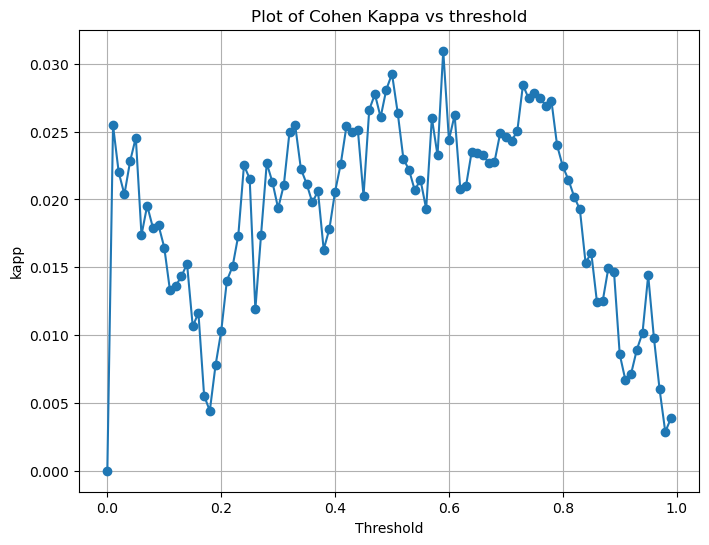

In [25]:
#acc curve creation
acclist = []
thresholdlist = []
maxval = 0
bestthresh = 0
for threshold in np.arange(0, 1, 0.01):
    #newval = acccalc(preds, threshold, ytrain)
    newval = acccalc(preds, threshold, ytest)
    acclist.append(newval)
    thresholdlist.append(threshold)
    if newval > maxval:
        maxval = newval
        bestthresh = threshold

import matplotlib.pyplot as plt
y_values = acclist
x_values = thresholdlist

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-')

print('optimal kappa of', maxval, 'at a threshold of', bestthresh)

# Add titles and labels
plt.title('Plot of Cohen Kappa vs threshold')
plt.ylabel('kapp')
plt.xlabel('Threshold')

# Display the plot
plt.grid(True)
plt.show()

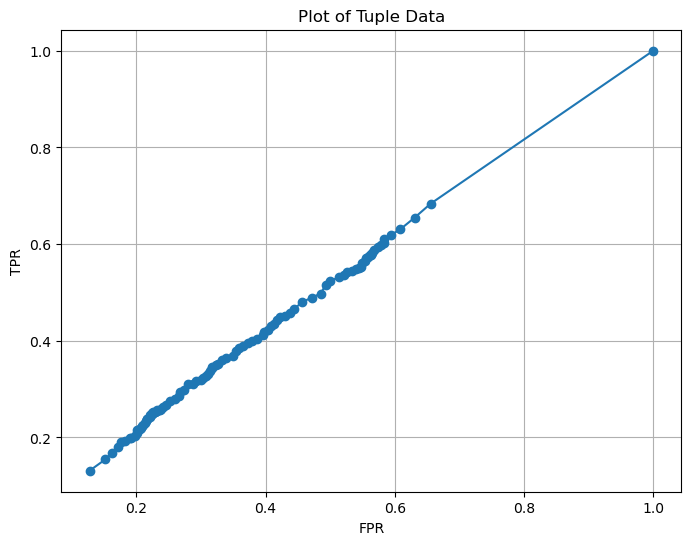

In [19]:
#ROC curve creation
ratelist = []
for threshold in np.arange(0, 1, 0.01):
    ratelist.append(ratecalc(preds, threshold, ytest))

import matplotlib.pyplot as plt
x_values = [x for x, y in ratelist]
y_values = [y for x, y in ratelist]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-')

# Add titles and labels
plt.title('Plot of Tuple Data')
plt.xlabel('FPR')
plt.ylabel('TPR')

# Display the plot
plt.grid(True)
plt.show()

In [20]:
correctcount = 0
fpcount = 0
tpcount = 0
tncount = 0
fncount = 0
testpos = 0
testneg = 0

iterations = 0
for value in preds:
    testscore = ytest[iterations]
    #testscore = ytrain[iterations]
    if value > bestthresh:
        if testscore != 0:
            testpos = testpos + 1
            correctcount = correctcount + 1
            tpcount = tpcount + 1
        else:
            fpcount = fpcount + 1
            testneg = testneg + 1
    else:
        if testscore != 0:
            testpos = testpos + 1
            fncount = fncount + 1
        else:
            testneg = testneg + 1
            correctcount = correctcount + 1
            tncount = tncount + 1

    iterations = iterations + 1


print('positives in data', testpos)
print('negatives in data', testneg, '\n')

print('fn count =', fncount)
print('tn count =', tncount)

print('tp count =', tpcount)
print('fp count =', fpcount, '\n')

netfn = fncount / (fncount + tncount)
nettn = tncount / (fncount + tncount)
netacc = correctcount / (fpcount + fncount + tpcount + tncount)
posacc = tpcount / testpos
negacc = tncount / testneg
netfp = fpcount / (fpcount + tpcount)
nettp = tpcount / (tpcount + fpcount)

print('net accuracy =', netacc)
print('positive accuracy =', posacc)
print('negative accuracy =', negacc, '\n')

fpr = fpcount / (fpcount + tncount)
tpr = tpcount / (tpcount + fncount)

print('fpr =', fpr)
print('tpr =', tpr, '\n')

f1 = (2 * tpcount) / ((2 * tpcount) + fpcount + fncount)
print('f1 score =',f1)

tp = tpcount
fp = fpcount
tn = tncount
fn = fncount

mcc = ((tp * tn) - (fp * fn)) / math.sqrt((fp + tn) * (tp + fp) * (tp + fn) * (tn + fn))

print('mcc =',mcc)

temp = (( ( (tp + fp) * (fp + tn) ) + ( (tp + fn) * (fn + tn) ) ))
kapp =  ( 2 * ((tp * tn) - (fn * fp)) ) / temp

print('cohen Kappa =',kapp)

positives in data 1075
negatives in data 1574 

fn count = 742
tn count = 1133
tp count = 333
fp count = 441 

net accuracy = 0.5534163835409589
positive accuracy = 0.3097674418604651
negative accuracy = 0.7198221092757306 

fpr = 0.28017789072426935
tpr = 0.3097674418604651 

f1 score = 0.36019469983775015
mcc = 0.03195022028972904
cohen Kappa = 0.030963842121326534


In [13]:
#To calculate how much better the model is than just random guessing '0' for all

correctcount = 0
fpcount = 0
tpcount = 0
tncount = 0
fncount = 0
testpos = 0
testneg = 0

iterations = 0
for value in ytest:
    if value == 0:
        testneg = testneg + 1
        correctcount = correctcount + 1
        tncount = tncount + 1
    else:
        testpos = testpos + 1
        fncount = fncount + 1
    iterations = iterations + 1


print('positives in data', testpos)
print('negatives in data', testneg, '\n')


netacc = correctcount / (iterations)

print('net accuracy =', netacc)

positives in data 1075
negatives in data 1574 

net accuracy = 0.5941864854662137


In [9]:
#Function to calculate net accuracy in relation to threshold
import math
def acccalc(predictions, threshold, toxtest):
    correctcount = 0
    fpcount = 0
    tpcount = 0
    tncount = 0
    fncount = 0
    testpos = 0
    testneg = 0

    loops = 0
    for pred in predictions:
        predtox = pred[0]
        realtox = toxtest[loops]
        if predtox > threshold:
            if realtox != 0:
                testpos = testpos + 1
                correctcount = correctcount + 1
                tpcount = tpcount + 1
            else:
                fpcount = fpcount + 1
                testneg = testneg + 1
        else:
            if realtox != 0:
                testpos = testpos + 1
                fncount = fncount + 1
            else:
                testneg = testneg + 1
                correctcount = correctcount + 1
                tncount = tncount + 1

        loops = loops + 1
        
    #netfn = fncount / (fncount + tncount)
    #nettn = tncount / (fncount + tncount)
    netacc = correctcount / (fpcount + fncount + tpcount + tncount)
    #posacc = tpcount / testpos
    #negacc = tncount / testneg
    #netfp = fpcount / (fpcount + tpcount)
    #nettp = tpcount / (tpcount + fpcount)

    fpr = fpcount / (fpcount + tncount)
    tpr = tpcount / (tpcount + fncount)



    f1 = (2 * tpcount) / ((2 * tpcount) + fpcount + fncount)


    tp = tpcount
    fp = fpcount
    tn = tncount
    fn = fncount

    
    temp = math.sqrt((fp + tn) * (tp + fp) * (tp + fn) * (tn + fn))
    if temp == 0:
        return 0
    mcc = ((tp * tn) - (fp * fn)) / temp



    temp = (( ( (tp + fp) * (fp + tn) ) + ( (tp + fn) * (fn + tn) ) ))
    if temp == 0:
        return 0
    kapp =  ( 2 * ((tp * tn) - (fn * fp)) ) / temp
    
    return kapp


In [8]:
#Creation of ROC as a metric
#Function to calculate fpr and tpr of a model given its predictions, the actual values and a threshold
def ratecalc(predictions, threshold, toxtest):
    fpcount = 0
    tpcount = 0
    tncount = 0
    fncount = 0

    loops = 0
    for pred in predictions:
        predtox = pred[0]
        realtox = toxtest[loops]
        if predtox > threshold:
            if realtox != 0:
                tpcount = tpcount + 1
            else:
                fpcount = fpcount + 1
        else:
            if realtox != 0:
                fncount = fncount + 1
            else:
                tncount = tncount + 1

        loops = loops + 1

    fpr = fpcount / (fpcount + tncount)
    tpr = tpcount / (tpcount + fncount)
    
    return(fpr, tpr)